# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])


print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
print(L)
# transpose of L. Warning: C remains a reference to L
C = L.T
print(C)
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

[[1 2 3 4 5]]
[[1]
 [2]
 [3]
 [4]
 [5]]
A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('img/image.jpg')

myimage

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

Array can be displayed as an image using Matplotlib module. Here a short example:

In [12]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 500x500 with 1 Axes>

See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [13]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    #return len(I[I==k])
    return (I==k).sum()
    #return np.count_nonzero(I == k)

def countPixels_loop(I, k):
    """ Array*int -> int"""
    cpt = 0
    for x in range(len(I)):
        for y in range(len(I[0])):
            if I[x][y] == k:
                cpt+=1
    return cpt

#TEST no loop
#print("Array:", A)
print("There's",countPixels(myimage, 4),"occurences of 4 in this array (no loop)")

#TEST loop
print("There's",countPixels_loop(myimage, 4),"occurences of 4 in this array (loop)")


There's 17167 occurences of 4 in this array (no loop)
There's 17167 occurences of 4 in this array (loop)


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

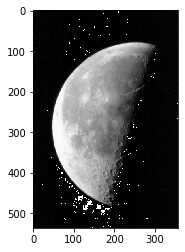

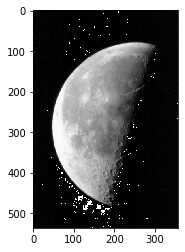

In [15]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    J = I.copy()
    J[J==k1]= k2
    return J
    
def replacePixels_loop(I,k1,k2):
    """ Array*int*int -> Array """
    J = np.zeros(I.shape)
    for x in range(len(I)) :
        for y in range(len(I[0])):
            v = I[x][y]
            if v == k1:
                J[x][y] = k2
            else:
                J[x][y] = v
    return J

#TEST no loop
newimage1 = replacePixels(myimage, 0, 255)
plt.imshow(newimage1)
plt.show()
#TEST loop
newimage2 = replacePixels_loop(myimage, 0, 255)
plt.imshow(newimage2)
plt.show()

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

TEST no loop
[80,180] After normalization:


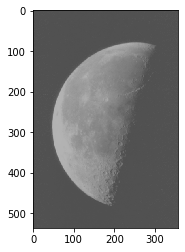

[120,160] After normalization:


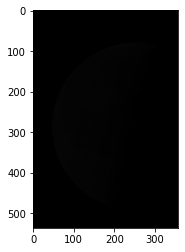


TEST loop
[80,180] After normalization:


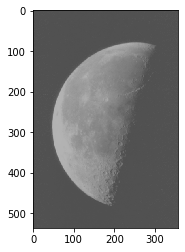

[120,160] After normalization:


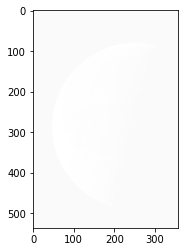

In [16]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    J = I.copy()
    kmin = np.amin(J)
    kmax = np.amax(J)
    return np.rint(((J - kmin)/(kmax - kmin)) * (k2-k1) + k1)

def normalizeImage_loop(I,k1,k2):
    """ Array*int*int -> Array """
    kmin = np.amin(I)
    kmax = np.amax(I)
    J = np.zeros(I.shape)
    for x in range(len(I)):
        for y in range(len(I[0])):
            J[x][y] = ((I[x][y] - kmin)/(kmax - kmin)) * (k2-k1) + k1
        
    return np.rint(J)

#TEST no loop
print("TEST no loop")
newimage3 = normalizeImage(myimage, 80, 180)
print("[80,180] After normalization:")
plt.imshow(newimage3,vmin=0,vmax=255)
plt.show()

newimage4 = normalizeImage(myimage, 0, 5)
print("[120,160] After normalization:")
plt.imshow(newimage4,vmin=0,vmax=255)
plt.show()



#TEST loop
print("\nTEST loop")
newimage3 = normalizeImage_loop(myimage, 80, 180)
print("[80,180] After normalization:")
plt.imshow(newimage3,vmin=0,vmax=255)
plt.show()

newimage4 = normalizeImage_loop(myimage, 250, 255)
print("[120,160] After normalization:")
plt.imshow(newimage4,vmin=0,vmax=255)
plt.show()


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

TEST no loop


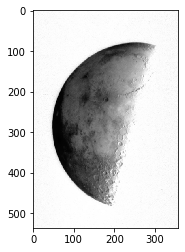


TEST loop


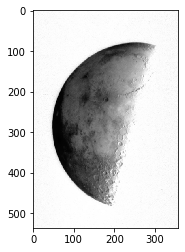

In [17]:
def inverteImage(I):
    """ Array -> Array """
    J = I.copy()
    return 255-J

def inverteImage_loop(I):
    """ Array -> Array """
    J = I.copy()
    for x in range(len(J)):
        for y in range(len(J[0])):
            J[x][y] = 255 - J[x][y]
    return J

#TEST no loop
print("TEST no loop")
newimage5 = inverteImage(myimage)
plt.imshow(newimage5)
plt.show()

#TEST loop
print("\nTEST loop")
newimage6 = inverteImage(myimage)
plt.imshow(newimage6)
plt.show()

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

Histogram:


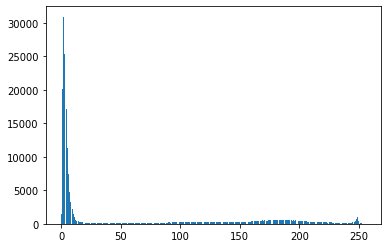

In [33]:
def computeHistogram(I):
    """ Array -> list[int] """
    kmax = int(np.amax(I))
    kmin = int(np.amin(I))
    dic = {}
    vals = set(())
    hist = np.zeros(256)
    #hist = np.zeros(kmax -kmin+1) 
    for x in range(len(I)):
        for y in range(len(I[0])):
            v = int(I[x][y])
            hist[v] += 1
            #if v in dic :
            #
            #else:
            #    dic[v] = 1
            #hist[v-kmin]+=1
            #vals.add(v)
    
    #return np.array(list(vals)),hist
    #return np.array(list(dic.keys())), np.array(list(dic.values()))
    return hist
#TEST 
hist = computeHistogram(myimage)
print("Histogram:")
plt.bar(np.arange(0,256), hist)
plt.show()
# use comments to answer to a verbal question

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

TEST no loop
After treatment:


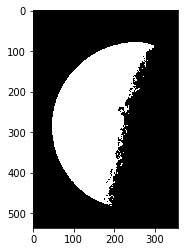

In [19]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    J = I.copy()
    J[J<s] = 0
    J[J>=s] = 255
    return J

print("TEST no loop")
newimage7 = thresholdImage(myimage, 70)
print("After treatment:")
plt.imshow(newimage7)
plt.show()

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

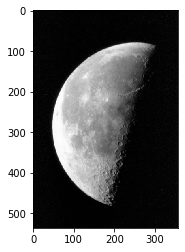

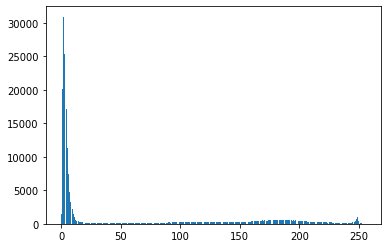

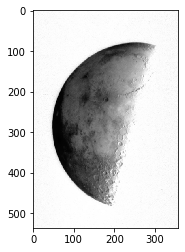

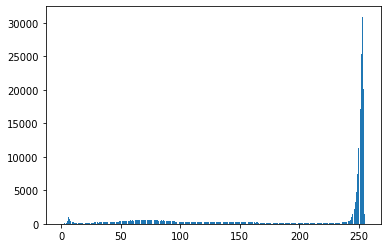

In [35]:
import matplotlib.pyplot as plt
plt.imshow(myimage)
plt.show()
hist = computeHistogram(myimage)
plt.bar(np.arange(256), hist)
plt.show()

myimage_inv = inverteImage(myimage)
plt.imshow(myimage_inv)
plt.show()
hist = computeHistogram(myimage_inv)
plt.bar(np.arange(256), hist)
plt.show()

#We do observe the color inversion in the inverted image. The histogram is also inverted, as expected.

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

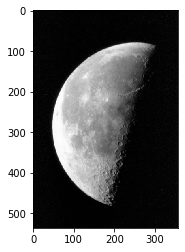

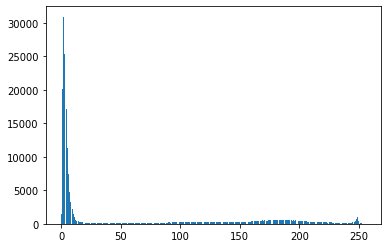

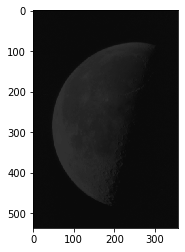

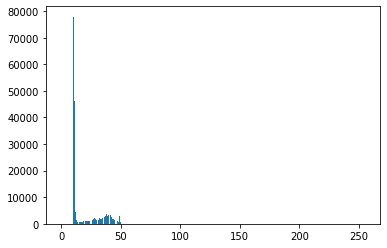

In [36]:
import matplotlib.pyplot as plt
plt.imshow(myimage)
plt.show()
hist = computeHistogram(myimage)
plt.bar(np.arange(256), hist)
plt.show()

myimage_norm = normalizeImage(myimage, 10,50)
plt.imshow(myimage_norm,vmin=0,vmax=255)
plt.show()
hist = computeHistogram(myimage_norm)
plt.bar(np.arange(256), hist)
plt.show()

#Comments on the results:
#We notice that, as expected, the new histogram has less bars because some of them have merged together.
#However, it doesnt change the overall look of the histogram and the understandiing we can get from it.
#(We can definitly the change in the picture tho)

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

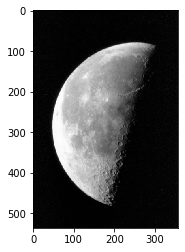

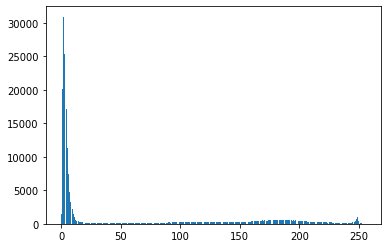

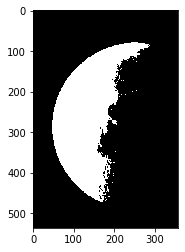

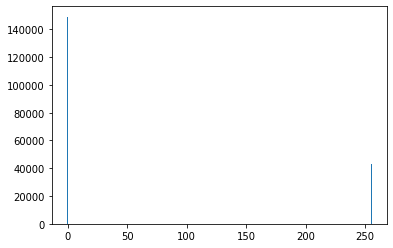

In [37]:
import matplotlib.pyplot as plt
plt.imshow(myimage)
plt.show()
hist = computeHistogram(myimage)
plt.bar(np.arange(256), hist)
plt.show()

myimage_thresh = thresholdImage(myimage, 127)
plt.imshow(myimage_thresh,vmin=0,vmax=255)
plt.show()
hist = computeHistogram(myimage_thresh)
plt.bar(np.arange(256), hist)
plt.show()


## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 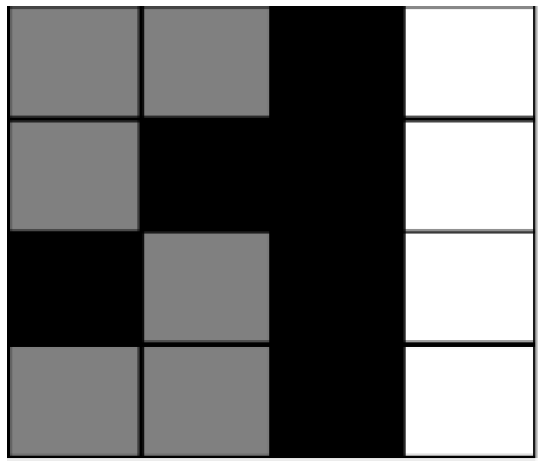 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

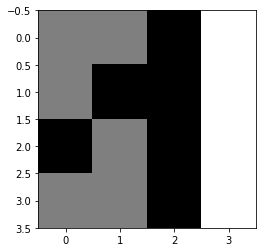

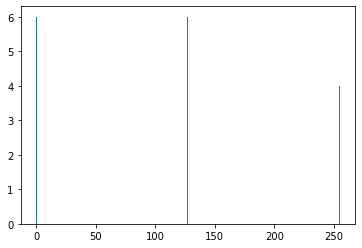

In [38]:
I = [[127,127,0,255],[127,0,0,255],[0,127,0,255],[127,127,0,255]]
plt.imshow(I)
plt.show()
hist= computeHistogram(I)
plt.bar(np.arange(256),hist)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

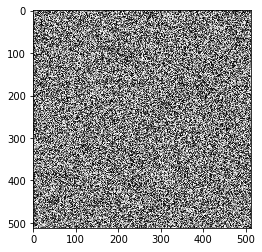

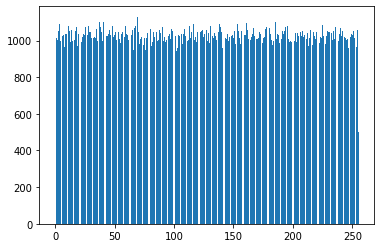

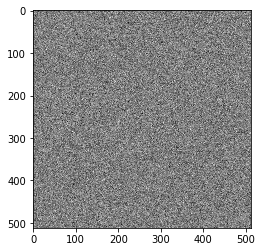

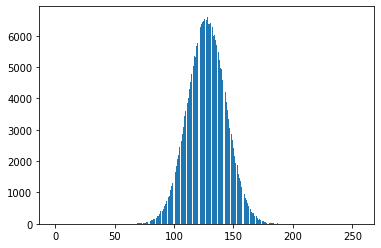

In [40]:
import numpy.matlib
#array of shape 512 by 512 having integer elements following an uniform distribution in the set  {0,1,⋯,255}
m1 = np.random.rand(512,512)
m1_norm = normalizeImage(m1,0, 255)
plt.imshow(m1_norm)
plt.show()
hist = computeHistogram(m1_norm)
plt.bar(np.arange(256), hist)
plt.show()

#an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with integer values
m2 = np.random.randn(512,512)*16+128
plt.imshow(m2)
plt.show()
hist = computeHistogram(m2)
plt.bar(np.arange(256), hist)
plt.show()


## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

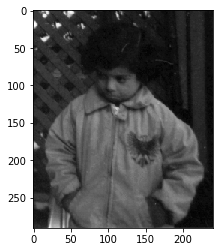

In [41]:
# reading an image and convert to array
poutimage = np.array(Image.open('img/pout.png'))

plt.imshow(poutimage)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

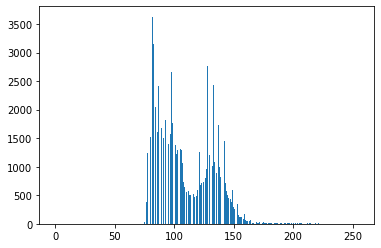

extrema: 143


In [42]:
hist = computeHistogram(poutimage)
plt.bar(np.arange(256),hist)
plt.show()

extrema = vals[np.argmax(hist)]
print("extrema:", extrema)

#Comments about quality

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

In [67]:
def histogramToCumulative(h):
    hc = np.zeros(h.shape)
    hc[0]=h[0]
    for i in range(1, len(h)):
        hc[i] = hc[i-1]+h[i] 
    
    return hc

#test
h = np.array([0,1,2,3,4])
print(histogramToCumulative(h))

[ 0.  1.  3.  6. 10.]


Original image:


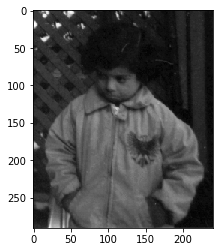

Equalized image:


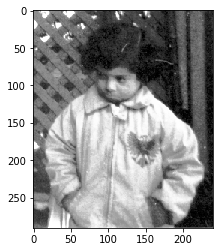

In [66]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    J = I.copy() #new image
    hc = histogramToCumulative(h) #cumulative histogram
    L = np.amax(I) - np.amin(I) #dynamic range
    for i in range(len(I)):
        for j in range(len(I[0])):
            oldx = I[i][j]
            newx = ((L-1)/I.size)*hc[oldx]
            J[i][j]=int(newx)
        
    return J

pout_equal = histogramEqualization(poutimage, computeHistogram(poutimage))
print("Original image:")
plt.imshow(poutimage)
plt.show()
print("Equalized image:")
plt.imshow(pout_equal)
plt.show()
    

We notice that the global contrast of the image has increased. We can now see more details in the originally dark areas.